# 한글 폰트 설치
## # 이 코드 실행 후 런타임 탭에서 '세션 다시시작' 을 눌러주세요. 그래야 한글이 깨지지 않고 잘 보입니다.

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!fc-list | grep "Nanum"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

# 설치한 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# Github에서 CSV 파일 불러오기
file_path = 'https://raw.githubusercontent.com/aarin9809/bigdata/main/hospital.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 최상단 데이터 몇 개 불러오기
data.head()


,암호화된요양기호,요양기관명,요양종별,시도명,시군구명,도로명주소,표시과목명,개설일자
0,JDQ4MTg4MSM1MSMkMiMkOCMkMDAkMzgxMzUxIzExIyQyIy...,읻다의원,의원,서울특별시,강남구,"서울특별시 강남구 도산대로 509, 에스디바이오센서 3층 (청담동)",일반의,2021-07-07
1,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkMzgxOTYxIzQxIyQxIy...,"""사""대한산업보건협회부설경북의원",의원,경상북도,경산시,경상북도 경산시 진량읍 공단1로 28,일반의,1995-01-24
2,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzIxIyQxIy...,(VOM)봄안과의원,의원,대구광역시,동구,"대구광역시 동구 안심로 58, 3층 (율하동, 율하메디빌)",안과,2014-01-02
3,JDQ4MTAxMiM1MSMkMSMkMCMkOTkkNTgxOTYxIzExIyQxIy...,(복지)예사랑병원,정신병원,부산광역시,서구,부산광역시 서구 옥천로130번길 38 (아미동2가),해당사항없음,2012-02-29
4,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzUxIyQxIy...,(사) 경찰공제회 포항의원,의원,경상북도,포항시 남구,경상북도 포항시 남구 오천읍 냉천로 656,일반의,2001-06-13


# 데이터 정리 및 전처리

In [44]:
# 불필요한 열 제거
columns_to_keep = ['요양기관명', '요양종별', '시도명', '시군구명', '표시과목명', '개설일자']
data_cleaned = data[columns_to_keep]

print(data_cleaned.head())

# 결측값을 '알 수 없음'으로 대체
data_cleaned.fillna('Unknown', inplace=True)

# 개설일자를 datetime 형식으로 변환
data_cleaned['개설일자'] = pd.to_datetime(data_cleaned['개설일자'], errors='coerce')

# 개설일자에서 연도 추출하여 트렌드 분석
data_cleaned['개설연도'] = data_cleaned['개설일자'].dt.year
data_cleaned.head()

               요양기관명  요양종별    시도명    시군구명   표시과목명        개설일자
0               읻다의원    의원  서울특별시     강남구     일반의  2021-07-07
1  "사"대한산업보건협회부설경북의원    의원   경상북도     경산시     일반의  1995-01-24
2         (VOM)봄안과의원    의원  대구광역시      동구      안과  2014-01-02
3          (복지)예사랑병원  정신병원  부산광역시      서구  해당사항없음  2012-02-29
4     (사) 경찰공제회 포항의원    의원   경상북도  포항시 남구     일반의  2001-06-13


<ipython-input-44-28e7e42b4ab0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.fillna('Unknown', inplace=True)
<ipython-input-44-28e7e42b4ab0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['개설일자'] = pd.to_datetime(data_cleaned['개설일자'], errors='coerce')
<ipython-input-44-28e7e42b4ab0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,요양기관명,요양종별,시도명,시군구명,표시과목명,개설일자,개설연도
0,읻다의원,의원,서울특별시,강남구,일반의,2021-07-07,2021.0
1,"""사""대한산업보건협회부설경북의원",의원,경상북도,경산시,일반의,1995-01-24,1995.0
2,(VOM)봄안과의원,의원,대구광역시,동구,안과,2014-01-02,2014.0
3,(복지)예사랑병원,정신병원,부산광역시,서구,해당사항없음,2012-02-29,2012.0
4,(사) 경찰공제회 포항의원,의원,경상북도,포항시 남구,일반의,2001-06-13,2001.0


In [45]:
# 정리된 데이터를 CSV 파일로 저장
cleaned_file_path = './sample_data/cleaned_hospital_data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
cleaned_file_path

'./sample_data/cleaned_hospital_data.csv'

# 단계 2: 분석

In [46]:
# 병원과 클리닉의 지역 분포
regional_distribution = data_cleaned['시도명'].value_counts()

# 병원/클리닉 수에 따른 주요 의료 전문 분야
top_specialties = data_cleaned['표시과목명'].value_counts().head(10)

# 병원/클리닉 개설의 연간 추세
yearly_trend = data_cleaned['개설연도'].value_counts().sort_index()

print("지역 분포:")
print(regional_distribution)
print("\n")
print("주요 의료 전문 분야:")
print(top_specialties)
print("\n")
print("연간 추세:")
print(yearly_trend)


지역 분포:
시도명
서울특별시      10750
경기도         9706
부산광역시       3306
대구광역시       2572
경상남도        2410
인천광역시       2104
경상북도        1804
전라북도        1581
충청남도        1532
전라남도        1454
대전광역시       1383
광주광역시       1373
충청북도        1141
강원특별자치도      973
울산광역시        775
제주특별자치도      580
세종특별자치시      238
Unknown        1
Name: count, dtype: int64


주요 의료 전문 분야:
표시과목명
해당사항없음     13003
치과          8000
한방          7085
일반의         4847
내과          2280
정형외과        1118
이비인후과       1071
소아청소년과       841
안과           758
정신건강의학과      696
Name: count, dtype: int64


연간 추세:
개설연도
1900.0       7
1903.0       1
1910.0       1
1946.0       1
1952.0       1
          ... 
2019.0    1980
2020.0    1760
2021.0    1771
2022.0    1909
2023.0    1802
Name: count, Length: 71, dtype: int64


# 3단계 : 시각화

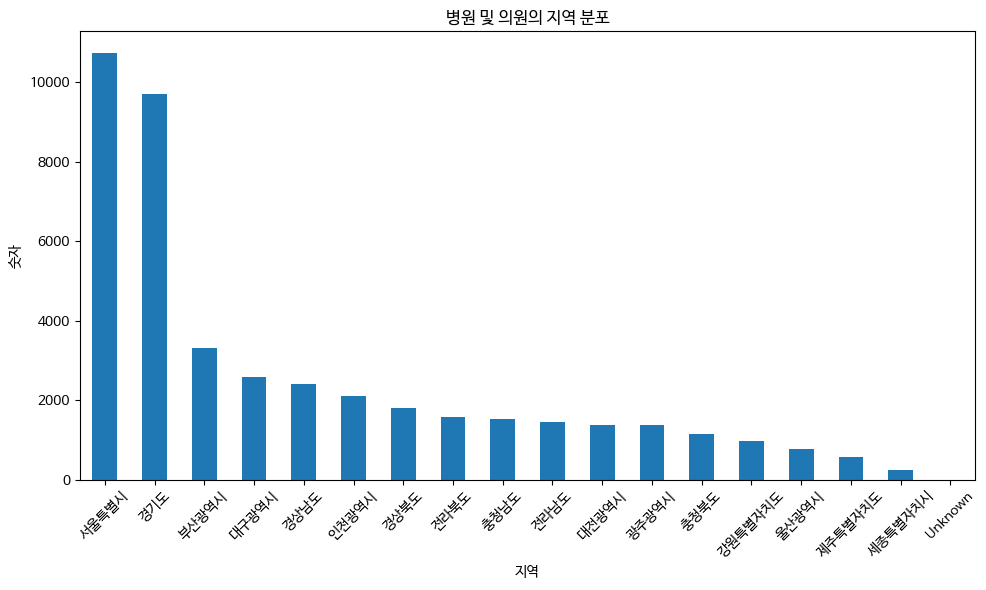

In [47]:
# 지역 분포 막대 차트
plt.figure(figsize=(10, 6))
regional_distribution.plot(kind='bar')
plt.title('병원 및 의원의 지역 분포')
plt.xlabel('지역')
plt.ylabel('숫자')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

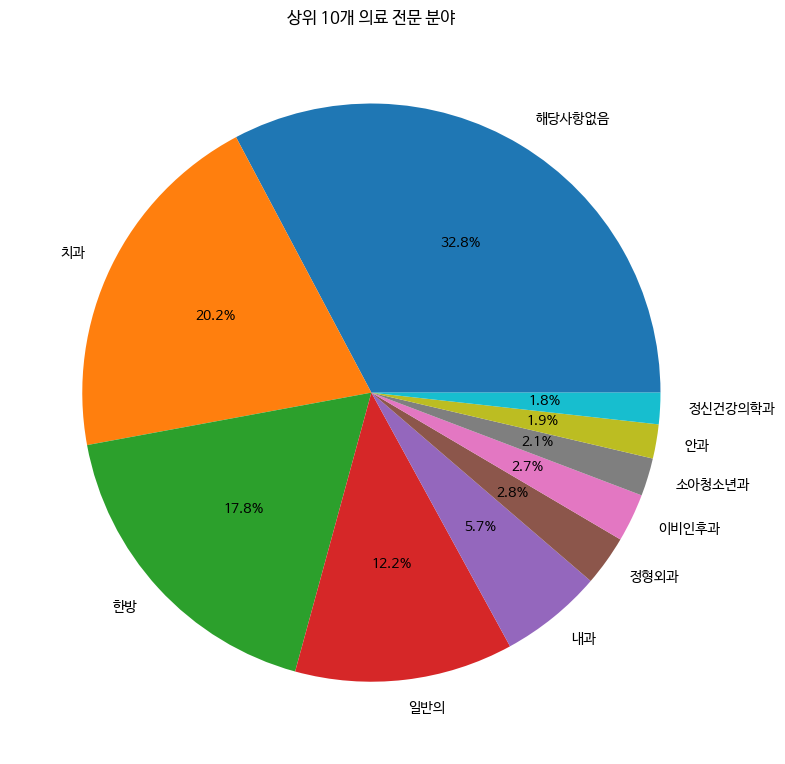

In [48]:
# 주요 의료 전문 분야 파이 차트
plt.figure(figsize=(8, 8))
top_specialties.plot(kind='pie', autopct='%1.1f%%')
plt.title('상위 10개 의료 전문 분야')
plt.ylabel('')
plt.tight_layout()
plt.show()
print("\n")

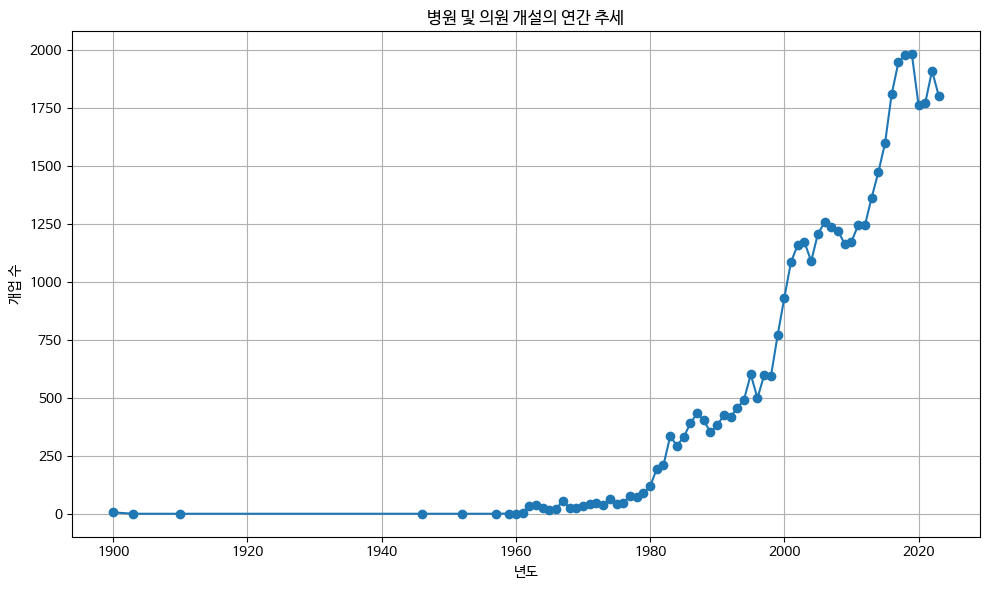

In [49]:
# 연간 추세 선 차트
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('병원 및 의원 개설의 연간 추세')
plt.xlabel('년도')
plt.ylabel('개업 수')
plt.grid()
plt.tight_layout()
plt.show()
print("\n")

# 병원 이름에서 주요 단어 추출 및 빈도 분석

In [50]:
# 병원 이름에서 단어 추출
all_words = ' '.join(data['요양기관명'].dropna())

# 2. 단어 분리
# 공백을 기준으로 단어를 분리
words_list = all_words.split()

# 3. 단어 빈도 계산
# Counter를 사용하여 단어의 빈도를 계산
word_counts = Counter(words_list)

# 4. 가장 많이 등장한 단어 추출
# most_common() 메서드로 상위 n개의 단어 추출
top_words = word_counts.most_common(10)

# 결과 출력
print("병원 이름에서 가장 많이 등장한 단어 상위 10개:")
for word, count in top_words:
    print(f"단어: {word} / 빈도: {count}번")

병원 이름에서 가장 많이 등장한 단어 상위 10개:
단어: 약국 / 빈도: 149번
단어: 경희한의원 / 빈도: 115번
단어: 건강약국 / 빈도: 109번
단어: 미소약국 / 빈도: 108번
단어: 치과의원 / 빈도: 99번
단어: 의원 / 빈도: 89번
단어: 사랑약국 / 빈도: 88번
단어: 드림약국 / 빈도: 85번
단어: 바른약국 / 빈도: 81번
단어: 한의원 / 빈도: 79번


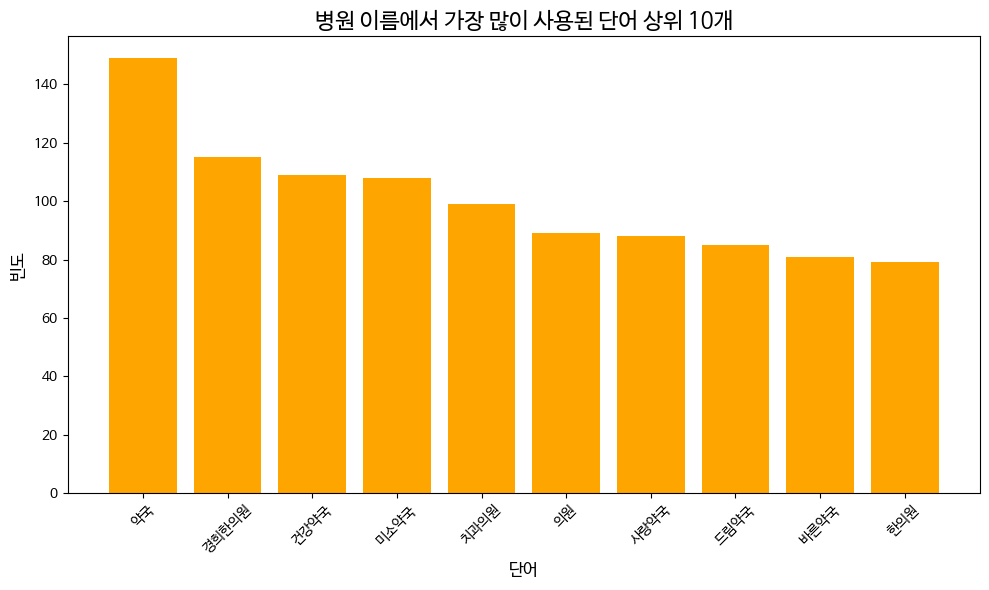

In [51]:
# 막대 그래프 생성
top_words_df = pd.DataFrame(top_words, columns=['단어', '빈도'])
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['단어'], top_words_df['빈도'], color='orange')
plt.title('병원 이름에서 가장 많이 사용된 단어 상위 10개', fontsize=16)
plt.xlabel('단어', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시군구별 병원 및집도 분석

In [52]:
# 시군구별 병원 개수 분석
city_counts = data['시군구명'].value_counts()
print("시군구별 병원 개수 상위 10개:")
print(city_counts.head(10))

시군구별 병원 개수 상위 10개:
시군구명
서구     1606
강남구    1493
중구     1145
북구     1054
남구     1000
동구      957
서초구     743
강서구     699
송파구     692
부천시     682
Name: count, dtype: int64


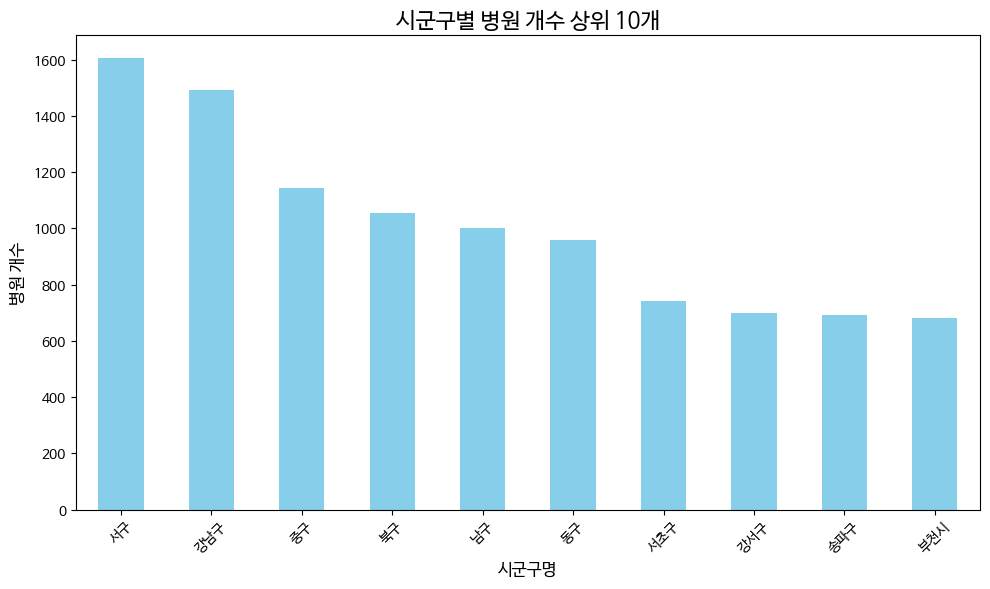

In [53]:
# 막대 그래프 생성
plt.figure(figsize=(10, 6))
city_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('시군구별 병원 개수 상위 10개', fontsize=16)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('병원 개수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 특정 과목(ex.내과) 개설 연도별 추이

In [54]:
# '내과' 과목 개설 연도별 추이 분석
data['개설일자'] = pd.to_datetime(data['개설일자'], errors='coerce')
data['개설연도'] = data['개설일자'].dt.year
internal_medicine_data = data[data['표시과목명'].str.contains('내과', na=False)]
internal_medicine_trend = internal_medicine_data['개설연도'].value_counts().sort_index()
print("내과 개설 연도별 개수:")
print(internal_medicine_trend)

내과 개설 연도별 개수:
개설연도
1966.0      1
1967.0      1
1969.0      1
1971.0      2
1974.0      1
1975.0      2
1977.0      1
1979.0      2
1980.0      5
1981.0      5
1982.0      4
1983.0     11
1984.0     12
1985.0     16
1986.0     19
1987.0     20
1988.0     20
1989.0     22
1990.0     27
1991.0     36
1992.0     39
1993.0     38
1994.0     42
1995.0     34
1996.0     32
1997.0     46
1998.0     46
1999.0     63
2000.0     60
2001.0     97
2002.0    107
2003.0     76
2004.0     53
2005.0     50
2006.0     70
2007.0     47
2008.0     51
2009.0     53
2010.0     46
2011.0     48
2012.0     58
2013.0     65
2014.0     65
2015.0     76
2016.0     85
2017.0     77
2018.0     81
2019.0     93
2020.0     73
2021.0     93
2022.0    117
2023.0     91
Name: count, dtype: int64


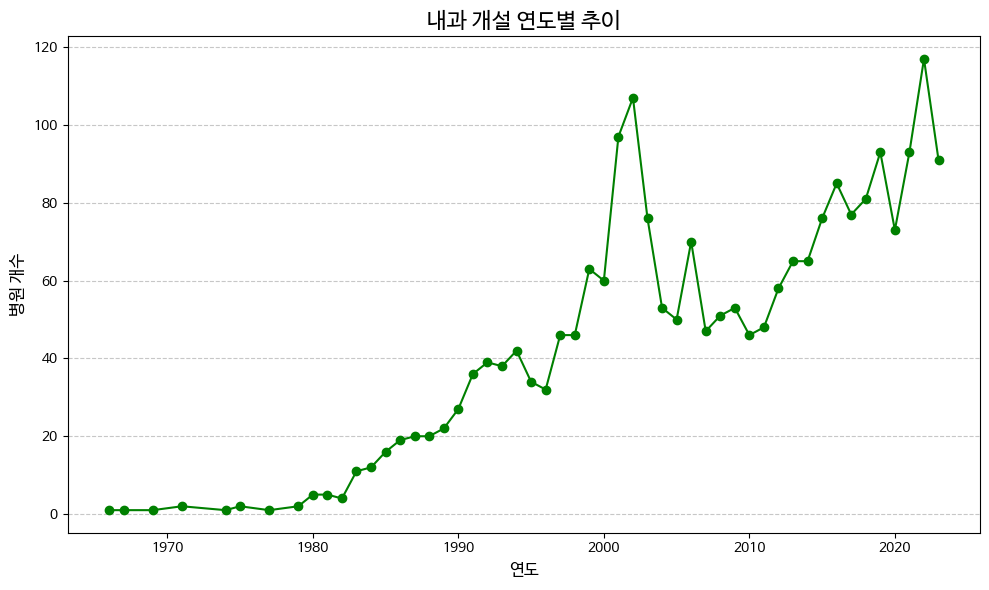

In [55]:
# 선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(internal_medicine_trend.index, internal_medicine_trend.values, marker='o', color='green')
plt.title('내과 개설 연도별 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('병원 개수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 계절별 병원 개설 분석

In [56]:
data['계절'] = data['개설일자'].dt.month % 12 // 3 + 1
season_counts = data['계절'].value_counts().sort_index()
print("계절별 병원 개설 개수:")
print(season_counts)

계절별 병원 개설 개수:
계절
1.0    10389
2.0    13443
3.0    10049
4.0     9801
Name: count, dtype: int64


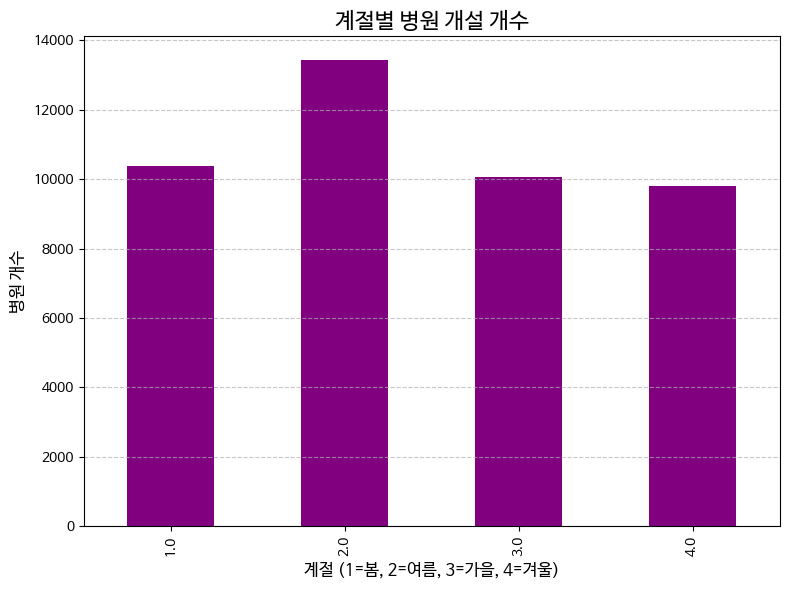

In [57]:
# 막대 그래프 생성
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='purple')
plt.title('계절별 병원 개설 개수', fontsize=16)
plt.xlabel('계절 (1=봄, 2=여름, 3=가을, 4=겨울)', fontsize=12)
plt.ylabel('병원 개수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
